<a href="https://colab.research.google.com/github/swapnil-mergal/Bank_customer_churn_prediction/blob/main/BANK_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BANK CHURN PREDICTION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/bank_churn_prediction.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Dropping Irrelevant Features

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding Categorical Data

In [ ]:
df = pd.get_dummies(df,drop_first = True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


# Some insights about the target variable

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='count'>

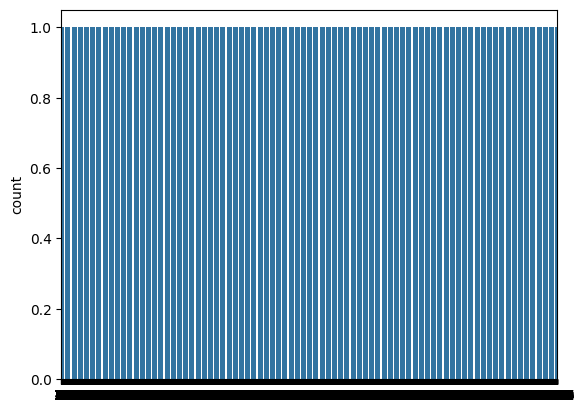

In [ ]:
sns.countplot(df['Exited'])

In [ ]:
X = df.drop('Exited',axis=1)
y = df['Exited']

# Handling Imbalanced Data with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='count'>

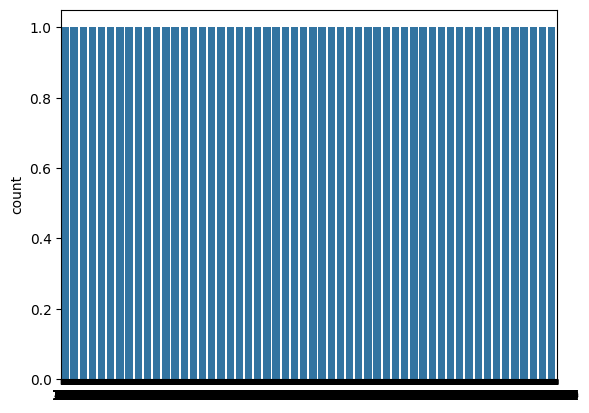

In [ ]:
sns.countplot(y_res)

# Splitting The Dataset into Training Set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.76059229, -0.89676633,  0.79385758, ..., -0.75522316,
         1.57220089, -1.22456179],
       [-0.67928222, -0.79668774,  1.16203681, ..., -0.75522316,
        -0.63605103,  0.81661866],
       [-1.32286249,  0.20409821,  0.79385758, ..., -0.75522316,
         1.57220089,  0.81661866],
       ...,
       [ 0.05156317,  0.4042554 ,  0.42567834, ...,  1.32411193,
        -0.63605103,  0.81661866],
       [ 0.47698064, -0.99684493, -1.41521783, ..., -0.75522316,
        -0.63605103,  0.81661866],
       [ 1.6332435 ,  2.20567011, -1.41521783, ..., -0.75522316,
        -0.63605103, -1.22456179]])

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.7674759313520302

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision_score(y_test, y_pred1)

0.7512295081967213

In [ ]:
recall_score(y_test, y_pred1)

0.7843388960205392

In [ ]:
f1_score(y_test,y_pred1)

0.7674272555997488

# SVC

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2=svm.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred2)

0.8308915864378401

In [ ]:
precision_score(y_test, y_pred2)

0.8302375809935205

In [ ]:
recall_score(y_test, y_pred2)

0.8224219084296106

In [ ]:
f1_score(y_test,y_pred2)

0.8263112639724849

# KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.8143574717455002

In [ ]:
precision_score(y_test, y_pred3)

0.7993393889347646

In [ ]:
recall_score(y_test, y_pred3)

0.8284124946512623

In [ ]:
f1_score(y_test,y_pred3)

0.8136163059466274

# Desicion Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred4)

0.7994976977814985

In [ ]:
precision_score(y_test, y_pred4)

0.7826978269782697

In [ ]:
recall_score(y_test, y_pred4)

0.8168592212237912

In [ ]:
f1_score(y_test,y_pred4)

0.7994137353433834

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5=rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.8583089158643784

In [ ]:
precision_score(y_test, y_pred5)

0.8556126820908312

In [ ]:
recall_score(y_test, y_pred5)


0.8545143346170304

In [ ]:
f1_score(y_test,y_pred5)

0.8550631556411903

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6=gbc.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred6)

0.8317287568020092

In [ ]:
precision_score(y_test,y_pred6)

0.8302455838000862

In [ ]:
recall_score(y_test,y_pred6)

0.8245614035087719

In [ ]:
f1_score(y_test,y_pred6)

0.8273937312151138

# XGBoost

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred7=model_xgb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred7)

0.8505650899958141

In [ ]:
precision_score(y_test,y_pred7)

0.8454661558109834

In [ ]:
recall_score(y_test,y_pred6)

0.8245614035087719

In [ ]:
f1_score(y_test,y_pred6)

0.8273937312151138

# Accuracy Summary

In [ ]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7)
          ]
})

In [ ]:
performance_summary

,Model,ACC
0,LR,0.767476
1,SVC,0.830892
2,KNN,0.814357
3,DT,0.799498
4,RF,0.858309
5,GBC,0.831729
6,XGB,0.850565


<Axes: xlabel='Model', ylabel='ACC'>

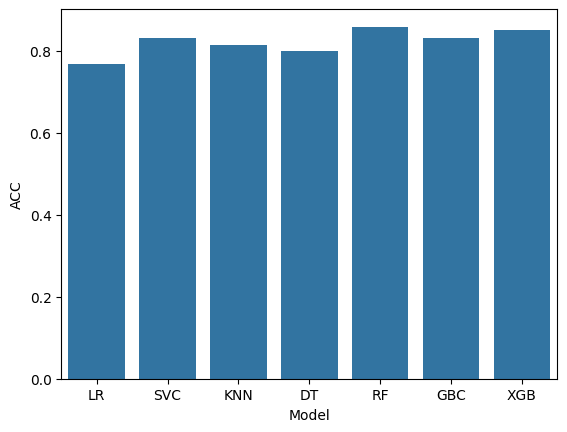

In [ ]:
import seaborn as sns

# Use the 'x' and 'y' arguments to specify the columns for plotting
sns.barplot(x='Model', y='ACC', data=performance_summary)

** As we can see, XGBoost Classifier has highest accuracy **

In [ ]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
            precision_score(y_test,y_pred6)
          ]
})

In [ ]:
performance_summary

,Model,PRECISION
0,LR,0.751230
1,SVC,0.830238
2,KNN,0.799339
3,DT,0.782698
4,RF,0.855613
5,GBC,0.830246
6,XGB,0.830246


<Axes: xlabel='Model', ylabel='PRECISION'>

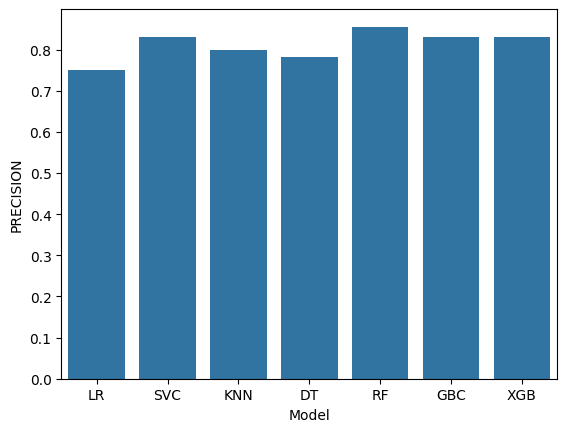

In [ ]:
# Use the 'x' and 'y' arguments to specify the columns for plotting
sns.barplot(x='Model', y='PRECISION', data=performance_summary)

# Saving the best model, XGBoost

In [ ]:
X_train = sc.fit_transform(X_train)


In [ ]:
model_xgb.fit(X_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
import joblib
joblib.dump(model_xgb, 'churn_predict_model')

['churn_predict_model']

In [ ]:
model = joblib.load('churn_predict_model')


In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')